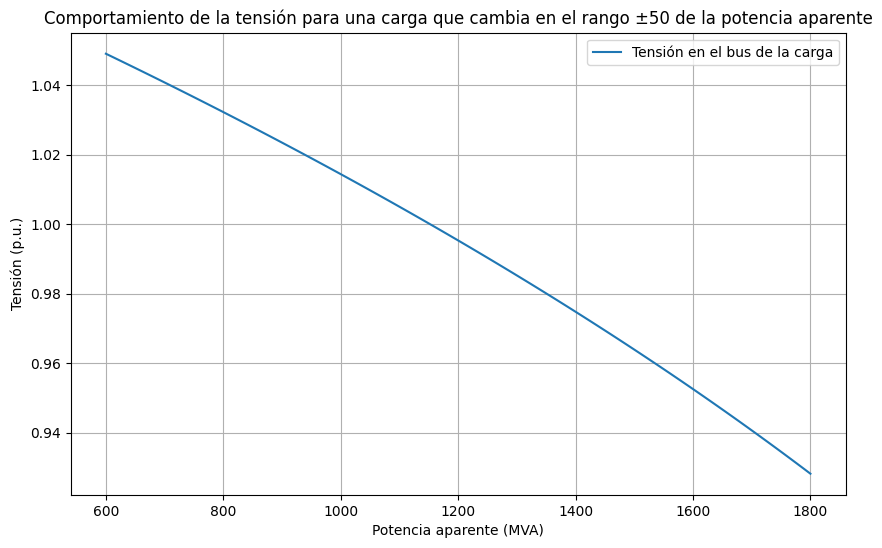

In [258]:

#Codigo nuevo
import numpy
import scipy
import numba
import matplotlib
import matplotlib.pyplot as plt
import pandapower as pp
import pandapower.networks
import pandapower.topology
import pandapower.plotting
import pandapower.converter
import pandapower.estimation
#Crear red vacia (net)
net = pp.create_empty_network()
#Crear barras
b1 = pp.create_bus(net, vn_kv=500., name="Bus 1")
b2 = pp.create_bus(net, vn_kv=500, name="Bus 2")
pp.create_ext_grid(net, bus=b1, vm_pu=1, name="Conexion de malla");
pp.create_load(net, bus=b2, p_mw=1080, q_mvar=523.069, name="Carga");
#Crear linea
pp.create_line_from_parameters(net, from_bus=b1, to_bus=b2, length_km=500, r_ohm_per_km=0.02, x_ohm_per_km=0.115, c_nf_per_km=19.1, max_i_ka=1)
pp.create_line_from_parameters(net, from_bus=b1, to_bus=b2, length_km=500, r_ohm_per_km=0.02, x_ohm_per_km=0.115, c_nf_per_km=19.1, max_i_ka=1)

# Potencia aparente inicial
s_initial = 1200  # en MVA
fp = 0.9  # factor de potencia

# Calcular la potencia activa y reactiva
p_initial = s_initial * fp  # en MW
q_initial = numpy.sqrt(s_initial**2 - p_initial**2)  # en MVar

# Crear un rango de potencias aparentes que represente el cambio de ±50%
s_range = numpy.linspace(s_initial*0.5, s_initial*1.5, num=100)

# Lista para guardar las tensiones
voltages = []

# Para cada potencia aparente en el rango
for s in s_range:
    # Calcular la nueva potencia activa y reactiva
    p = s * fp
    q = numpy.sqrt(s**2 - p**2)
    
    # Actualizar la carga en la red
    net.load.loc[0, 'p_mw'] = p
    net.load.loc[0, 'q_mvar'] = q
    
    # Ejecutar una simulación de flujo de potencia
    pp.runpp(net, max_iteration=2000, tolerance_mva=1e-9)
    
    # Guardar la tensión en el bus de la carga
    voltages.append(net.res_bus.vm_pu[b2])

# Graficar la tensión en función de la potencia aparente
plt.figure(figsize=(10, 6))
plt.plot(s_range, voltages, label='Tensión en el bus de la carga')
plt.xlabel('Potencia aparente (MVA)')
plt.ylabel('Tensión (p.u.)')
plt.title('Comportamiento de la tensión para una carga que cambia en el rango ±50 de la potencia aparente')
plt.legend()
plt.grid(True)
plt.show()



In [259]:
import numpy as np
import cmath

# Parámetros de la línea
r = 0.02  # resistencia por km
x = 0.115  # reactancia por km
c = 19.1 * 1e-9  # capacitancia por km en faradios
l = 500  # longitud de la línea en km
f = 50  # frecuencia en Hz

# Convertir la capacitancia a la admitancia
omega = 2 * np.pi * f
y = 1j * omega * c

# Parámetros de la línea por unidad de longitud
Z = r + 1j * x
Y = y

# Parámetros de la línea total
Z_total = Z * l
Y_total = Y * l

# Cálculo de los parámetros ABCD para una línea larga
gamma = cmath.sqrt(Z_total * Y_total)
Zc = cmath.sqrt(Z_total / Y_total)

A = cmath.cosh(gamma)
B = Zc * cmath.sinh(gamma)
C = (1 / Zc) * cmath.sinh(gamma)
D = A

# Creación de la matriz ABCD
ABCD = np.array([[A, B], [C, D]])

print("Matriz ABCD:")
print(ABCD)

Matriz ABCD:
[[ 9.14939702e-01+1.45734594e-02j  9.43228339e+00+5.59096754e+01j]
 [-1.47449763e-05+2.91467707e-03j  9.14939702e-01+1.45734594e-02j]]


In [260]:
#Visualizar
net.res_bus #Visualizar resultados de barras


,vm_pu,va_degree,p_mw,q_mvar
0,1.000000,0.000000,-1681.366042,258.821742
1,0.928206,-11.404131,1620.000000,784.601810


In [261]:
net.res_line #Visualizar resultados de lineas

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,840.683021,-129.410871,-810.0,-392.300905,30.683021,-521.711776,0.982171,1.119611,1.119611,1.0,0.0,0.928206,-11.404131,111.961132
1,840.683021,-129.410871,-810.0,-392.300905,30.683021,-521.711776,0.982171,1.119611,1.119611,1.0,0.0,0.928206,-11.404131,111.961132


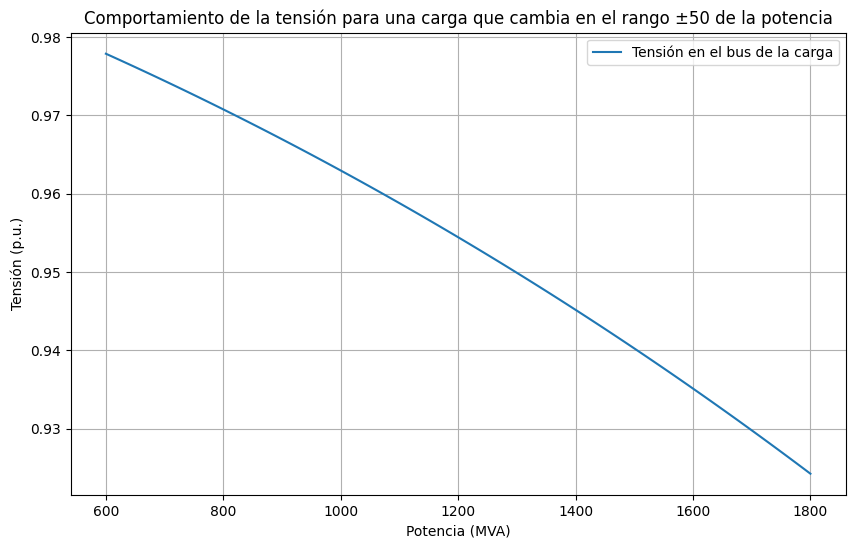

In [262]:
import matplotlib.pyplot as plt
import numpy

# Potencia inicial
p_initial = 1200  # en MVA, 1200 MVA.

# Crear un rango de potencias que represente el cambio de ±50%
p_range = numpy.linspace(p_initial*0.5, p_initial*1.5, num=100)

# Lista para guardar las tensiones
voltages = []

# Para cada potencia en el rango
for p in p_range:
    # Actualizar la carga en la red
    net.load.loc[0, 'p_mw'] = p
    
    # Ejecutar una simulación de flujo de potencia
    pp.runpp(net, tolerance_mva=100, max_iteration=100)
    
    # Guardar la tensión en el bus de la carga
    voltages.append(net.res_bus.vm_pu[b2])

# Graficar la tensión en función de la potencia
plt.figure(figsize=(10, 6))
plt.plot(p_range, voltages, label='Tensión en el bus de la carga')
plt.xlabel('Potencia (MVA)')
plt.ylabel('Tensión (p.u.)')
plt.title('Comportamiento de la tensión para una carga que cambia en el rango ±50 de la potencia')
plt.legend()
plt.grid(True)
plt.show()